# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:**  Maulidina Rahmawati
- **Email:** maulidinarhmwt@gmail.com
- **ID Dicoding:** MC009D5X2352

## Menentukan Pertanyaan Bisnis

- Seberapa banyak pembeli yang melakukan pembayaran menggunakan metode kredit?
- Seberapa cepat pembeli membuat review setelah barang sampai?



## Import Semua Packages/Library yang Digunakan

In [30]:
# prompt: i want to import packages to know how much buyers using credits payment (i have buyers data in csv, so maybe using packages to count some specific fill in cells to know how much it is)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
import numpy as np


## Data Wrangling

### Gathering Data

In [12]:
from google.colab import files
uploaded1 = files.upload()

Saving order_payments_dataset.csv to order_payments_dataset (1).csv


In [11]:
from google.colab import files
uploaded2 = files.upload()

Saving order_reviews_dataset.csv to order_reviews_dataset (1).csv


In [41]:
from google.colab import files
uploaded3 = files.upload()

Saving orders_dataset.csv to orders_dataset.csv


In [23]:
uploaded_file_key = list(uploaded1.keys())[0]

# Use the uploaded_file_key to access the correct file name in the dictionary.
df_payments = pd.read_csv(io.BytesIO(uploaded1[uploaded_file_key]))
print(df_payments.head())

                           order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45  


In [25]:
uploaded_file_key = list(uploaded2.keys())[0]
df_review = pd.read_csv(io.BytesIO(uploaded2[uploaded_file_key]))
print(df_review.head())

                          review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3           

In [44]:
uploaded_file_key = list(uploaded3.keys())[0]
df_order = pd.read_csv(io.BytesIO(uploaded3[uploaded_file_key]))
print(df_order.head())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08

**Insight:**

Dataset ini mencakup data pembayaran dan review pelanggan. Dari data pembayaran, mayoritas transaksi menggunakan kartu kredit, dengan beberapa pelanggan memilih cicilan hingga 8 kali. Nilai pembayaran bervariasi, menunjukkan perbedaan harga produk yang dibeli.

Sementara itu, data review menunjukkan sebagian besar pelanggan memberikan rating tinggi (4-5), meskipun banyak yang tidak menulis komentar. Beberapa review berisi pujian, terutama terkait pengiriman cepat. Analisis lebih lanjut dapat melihat hubungan antara metode pembayaran, jumlah cicilan, dan kepuasan pelanggan, serta mengevaluasi kecepatan respons customer service terhadap ulasan.

In [26]:
df_payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


from matplotlib import pyplot as plt
_df_0['payment_sequential'].plot(kind='hist', bins=20, title='payment_sequential')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['payment_installments'].plot(kind='hist', bins=20, title='payment_installments')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['payment_value'].plot(kind='hist', bins=20, title='payment_value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='payment_sequential', y='payment_installments', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='payment_installments', y='payment_value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['payment_sequential'].plot(kind='line', figsize=(8, 4), title='payment_sequential')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['payment_installments'].plot(kind='line', figsize=(8, 4), title='payment_installments')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['payment_value'].plot(kind='line', figsize=(8, 4), title='payment_value')
plt.gca().spines[['top', 'right']].set_visible(False)

### Assessing Data

In [45]:
df_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [46]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [47]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


**Insight:**

Dataset pembayaran memiliki **103.886 entri** dengan 5 kolom utama, di mana semua data lengkap tanpa nilai kosong. Metode pembayaran direpresentasikan sebagai kategori (`payment_type`), sedangkan jumlah cicilan (`payment_installments`) dan nilai pembayaran (`payment_value`) berbentuk numerik.  

Dataset review berisi **99.224 entri** dengan 7 kolom, tetapi banyak data komentar kosong—hanya **11.568 review yang memiliki judul** dan **40.977 yang memiliki pesan review**. Ini menunjukkan bahwa sebagian besar pelanggan hanya memberi rating tanpa komentar. Semua review memiliki **order_id**, memungkinkan penghubungan dengan dataset pembayaran untuk analisis lebih lanjut. Tanggal review dan timestamp jawaban bisa digunakan untuk mengevaluasi responsivitas customer service.

### Cleaning Data

In [48]:
print (df_payments.isnull().sum())

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


In [49]:
print (df_review.isnull().sum())

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


In [50]:
print (df_order.isnull().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [51]:
print (df_payments.duplicated().sum())

0


In [52]:
print (df_review.duplicated().sum())

0


In [53]:
print (df_order.duplicated().sum())

0


**Insight:**

Dataset payments tidak memiliki missing values, sehingga semua transaksi tercatat dengan lengkap.

Sebaliknya, dataset review memiliki banyak data kosong, terutama pada review_comment_title (87.656 entri kosong) dan review_comment_message (58.247 entri kosong). Ini menunjukkan bahwa mayoritas pelanggan hanya memberikan rating tanpa menulis komentar. Namun, semua review memiliki order_id, review_score, dan timestamp, sehingga analisis kepuasan pelanggan masih bisa dilakukan berdasarkan rating dan waktu respons customer service.

Sedangkan jumlah dataset yang terduplikat tidak ada.

Sementara itu, dalam dataset order:

- Sebagian besar data lengkap, tetapi ada 160 pesanan tanpa approval timestamp, kemungkinan ada transaksi yang tidak diproses atau gagal.
- 1.783 pesanan tanpa tanggal pengiriman ke kurir, bisa jadi ada delay atau masalah dalam pencatatan logistik.
- 2.965 pesanan tanpa tanggal diterima pelanggan, menunjukkan kemungkinan keterlambatan atau pesanan yang tidak sampai.
- Estimasi tanggal pengiriman selalu ada, berarti sistem selalu mencatat target pengiriman meskipun realisasi bisa berbeda.

## Exploratory Data Analysis (EDA)

### Explore ...

**menghitung jumlah nilai unik**

In [54]:
print(df_payments.nunique())

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64


In [55]:
print(df_review.nunique())

review_id                  98410
order_id                   98673
review_score                   5
review_comment_title        4527
review_comment_message     36159
review_creation_date         636
review_answer_timestamp    98248
dtype: int64


In [56]:
print(df_order.nunique())

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64


**menentukan korelasi antar variabel numerik**

In [57]:
print(df_payments.corr(numeric_only=True))

                      payment_sequential  payment_installments  payment_value
payment_sequential              1.000000             -0.086363      -0.069593
payment_installments           -0.086363              1.000000       0.330811
payment_value                  -0.069593              0.330811       1.000000


In [58]:
print(df_review.corr(numeric_only=True))

              review_score
review_score           1.0


In [59]:
print(df_order.corr(numeric_only=True))

Empty DataFrame
Columns: []
Index: []


**menampilkan 5 nilai terbawah**

In [60]:
print(df_payments.tail())

                                order_id  payment_sequential payment_type  \
103881  0406037ad97740d563a178ecc7a2075c                   1       boleto   
103882  7b905861d7c825891d6347454ea7863f                   1  credit_card   
103883  32609bbb3dd69b3c066a6860554a77bf                   1  credit_card   
103884  b8b61059626efa996a60be9bb9320e10                   1  credit_card   
103885  28bbae6599b09d39ca406b747b6632b1                   1       boleto   

        payment_installments  payment_value  
103881                     1         363.31  
103882                     2          96.80  
103883                     1          47.77  
103884                     5         369.54  
103885                     1         191.58  


In [61]:
print(df_review.tail())

                              review_id                          order_id  \
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
99219             5                  NaN   
99220             5                  NaN   
99221             5                  NaN   
99222             4                  NaN   
99223             1                  NaN   

                                  review_comment_message review_creation_date  \
99219                                                NaN  2018-07-07 00:00:00   
99220                                                NaN  2017-12-09 00:00:00   
99221  Excelente mochila, ent

In [62]:
print(df_order.tail())

                               order_id                       customer_id  \
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp    order_approved_at  \
99436    delivered      2017-03-09 09:54:05  2017-03-09 09:54:05   
99437    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
99438    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
99439    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
99440    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

      order_delivered_carrier_date order_delivered_customer_date  \
99436          2017-03-10 11:18:03           2017-03-17 15:0

**menghitung jumlah kemunculan tiap kategori dalam kolom tertentu**

In [63]:
print(df_payments['payment_type'].value_counts())

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64


In [64]:
print(df_review['review_answer_timestamp'].value_counts())

review_answer_timestamp
2017-06-15 23:21:05    4
2018-02-26 15:53:18    3
2018-04-07 21:13:05    3
2017-02-21 23:30:22    3
2017-08-12 14:35:35    3
                      ..
2018-08-20 12:43:33    1
2018-01-16 20:42:07    1
2018-05-13 13:19:11    1
2018-03-19 12:59:37    1
2017-07-03 21:01:49    1
Name: count, Length: 98248, dtype: int64


In [65]:
print(df_order['order_delivered_customer_date'].value_counts())

order_delivered_customer_date
2018-05-08 23:38:46    3
2016-10-27 17:32:07    3
2018-02-14 21:09:19    3
2017-06-19 18:47:51    3
2018-05-08 19:36:48    3
                      ..
2018-07-12 17:48:45    1
2018-05-18 18:24:36    1
2018-01-17 13:29:13    1
2018-06-29 11:21:34    1
2018-03-16 13:08:30    1
Name: count, Length: 95664, dtype: int64


**Insight:**

- Credit card (74%) jadi metode pembayaran utama, cicilan lebih sering dipakai
untuk transaksi besar.
- 59% review tanpa komentar, bisa ditingkatkan untuk insight lebih baik.
- 99.441 customer unik, tiap pesanan hanya dari satu customer.
- Pengiriman rata-rata 1-2 minggu, beberapa dikirim dalam batch.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Seberapa banyak pembeli yang melakukan pembayaran menggunakan metode kredit?


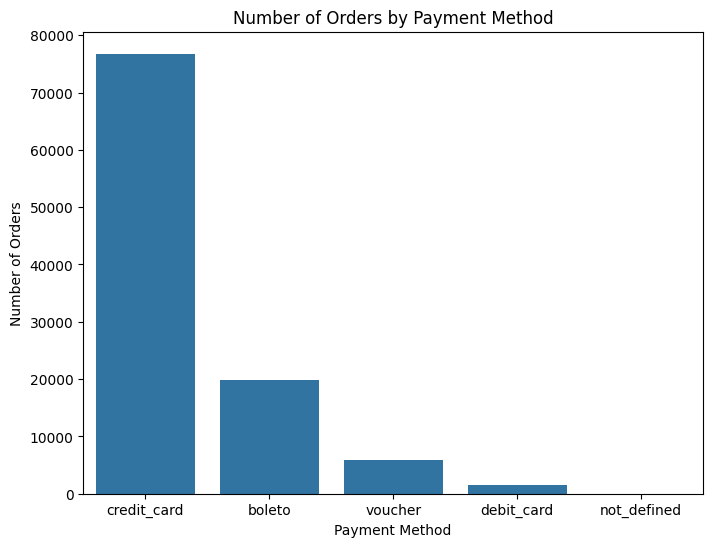

In [66]:
plt.figure(figsize=(8, 6))
sns.countplot(x='payment_type', data=df_payments)
plt.title('Number of Orders by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Orders')
plt.show()


### Pertanyaan 2:

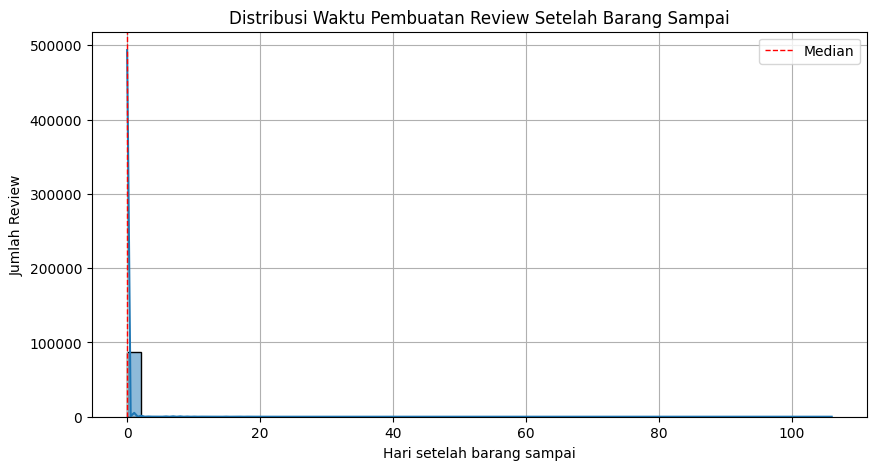

In [78]:
# Gabungkan dataset berdasarkan 'order_id'
merged_df = pd.merge(df_order, df_review, on='order_id')

# Konversi ke datetime
merged_df["order_delivered_customer_date"] = pd.to_datetime(merged_df["order_delivered_customer_date"])
merged_df["review_creation_date"] = pd.to_datetime(merged_df["review_creation_date"])

# Hitung selisih waktu dalam hari antara review dan barang sampai
merged_df["days_to_review"] = (merged_df["review_creation_date"] - merged_df["order_delivered_customer_date"]).dt.days

merged_df = merged_df[merged_df["days_to_review"] >= 0]


# Plot distribusi waktu review
plt.figure(figsize=(10, 5))
sns.histplot(merged_df["days_to_review"], bins=50, kde=True)
plt.axvline(merged_df["days_to_review"].median(), color='red', linestyle='dashed', linewidth=1, label='Median')
plt.xlabel("Hari setelah barang sampai")
plt.ylabel("Jumlah Review")
plt.title("Distribusi Waktu Pembuatan Review Setelah Barang Sampai")
plt.legend()
plt.grid(True)
plt.show()


### **Insight tentang Metode Pembayaran:**  
- **Kartu Kredit Dominan:** Mayoritas pesanan dibayar dengan kartu kredit, kemungkinan karena kemudahan transaksi dan fasilitas cicilan.  
- **Boleto sebagai Alternatif:** Metode pembayaran populer kedua, digunakan oleh pelanggan tanpa kartu kredit atau yang lebih memilih pembayaran tunai.  
- **Voucher & Debit Card Kurang Populer:** Digunakan dalam situasi tertentu seperti promo atau cashback.  
- **Kategori "not_defined" Hampir Tidak Ada:** Kemungkinan error data atau metode pembayaran yang jarang digunakan.  

**Potensi Tindakan Bisnis:**  
- Tawarkan insentif untuk pembayaran non-kartu kredit, seperti diskon untuk boleto.  
- Dorong penggunaan kartu kredit untuk mempercepat transaksi.  
- Eksplorasi metode lain seperti e-wallet untuk menarik lebih banyak pelanggan.  

### **Insight tentang Waktu Pembuatan Review:**  
- **Mayoritas Review Dibuat Cepat:** Sebagian besar pelanggan memberikan review pada hari barang tiba atau beberapa hari setelahnya.  
- **Review Sebelum Barang Sampai (Outlier Negatif):** Bisa terjadi karena kesalahan sistem atau review dari pengalaman sebelumnya.  
- **Review Lama Setelah Barang Sampai (Outlier Positif):** Beberapa pelanggan menunggu hingga mereka yakin atau setelah mendapat pengingat dari platform.  
- **Median 0 Hari:** Setengah dari total review diberikan pada hari barang sampai, menunjukkan dorongan kuat dari notifikasi atau insentif e-commerce.

In [76]:
all_df = pd.merge(
    pd.merge(df_payments, df_review, on='order_id'),
    df_order, on='order_id'
)
all_df.to_csv("all_data.csv", index=False)

## Conclusion